# **Data Analysis**
This notebook analyzes the `diabetes.csv` dataset using Python libraries.

## **1. Importing Libraries**
We import necessary libraries for data manipulation, visualization, and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Loading the Dataset**
We read the dataset from `diabetes.csv` into a Pandas DataFrame.

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Mq930/Exploratory-Data-Analysis/refs/heads/main/diabetes.csv")

## **3. Understanding the Data**
We check the dataset’s shape, structure, and summary statistics.

In [3]:
df.shape

(768, 9)

There are a total of 9 features and 768 Rows

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset only consists of numeric features 

## **5. Data Cleaning (if required)**
We handle missing values, duplicates, or incorrect data if present.

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total number of NaN values: 0

## **6. Statistical Overview**
We analyze features present variables to understand their Statiscal Nature.

In [7]:
#General Statistical Overview of the Dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose, bloodpressure, Skin Thickness and BMI cannot be zero,we'll check them out later

## **7. Making Changes for analysis**
Changing the outcome feature for better readability

In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
#Changing the outcome feature for better readability
df["Outcome"]=df.Outcome.map({0:"Non diabetic",1:"diabetic"})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,diabetic
1,1,85,66,29,0,26.6,0.351,31,Non diabetic
2,8,183,64,0,0,23.3,0.672,32,diabetic
3,1,89,66,23,94,28.1,0.167,21,Non diabetic
4,0,137,40,35,168,43.1,2.288,33,diabetic


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


## **4. Data Visualization**
We use plots to understand trends and patterns in the dataset.

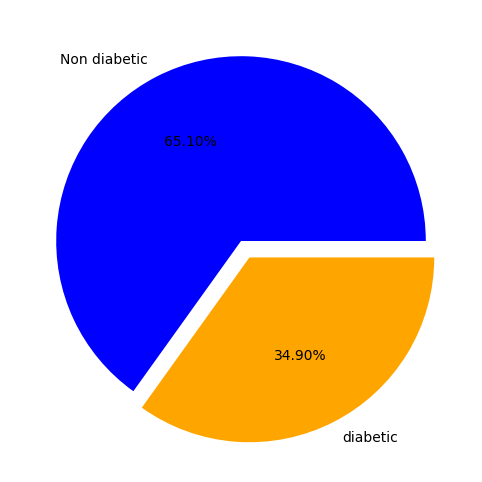

In [11]:
#visualising outcome 
Outcome_names=df["Outcome"].value_counts().index
Outcome_values=df["Outcome"].value_counts().values
plt.rcParams["figure.figsize"]=(12,6)
plt.pie(Outcome_values,labels=Outcome_names,autopct="%1.2f%%",colors=["blue","orange"],explode=[0,0.1])
plt.show()

There are Less diabetic patients compared to Non diabetic 

## **Factors that effect a person to be diabetic** ##

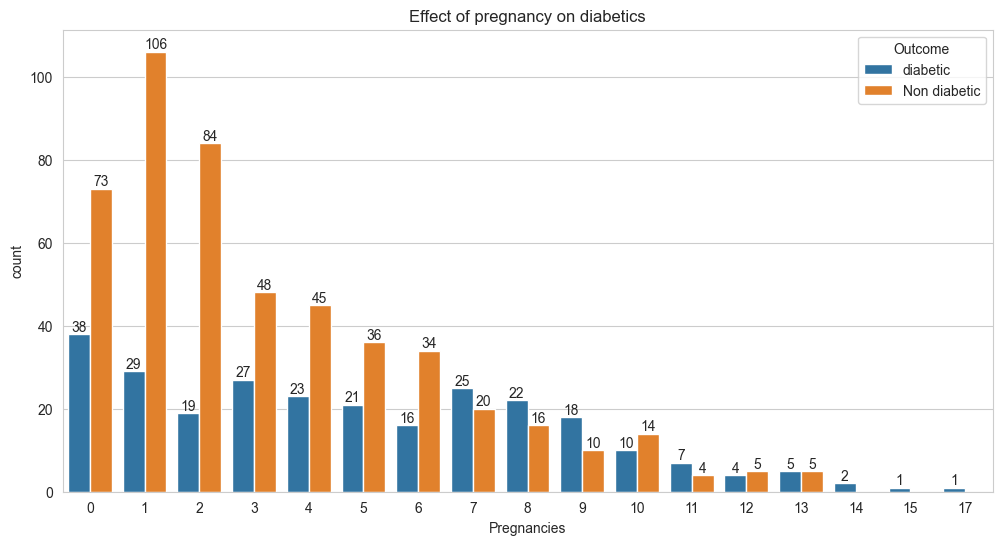

In [12]:
#Pregnancies
sns.set_style("whitegrid")
a=sns.countplot(data=df,x="Pregnancies",hue="Outcome")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.title("Effect of pregnancy on diabetics")
plt.show()

non-diabetic individuals generally have a higher frequency of lower pregnancy counts (0–6) compared to diabetic individuals However for higher pregnancy counts (7+) the difference in frequency between diabetic and non-diabetic individuals becomes less pronounced. This suggests that lower pregnancy counts are more common overall but higher pregnancy counts may be more associated with diabetes.

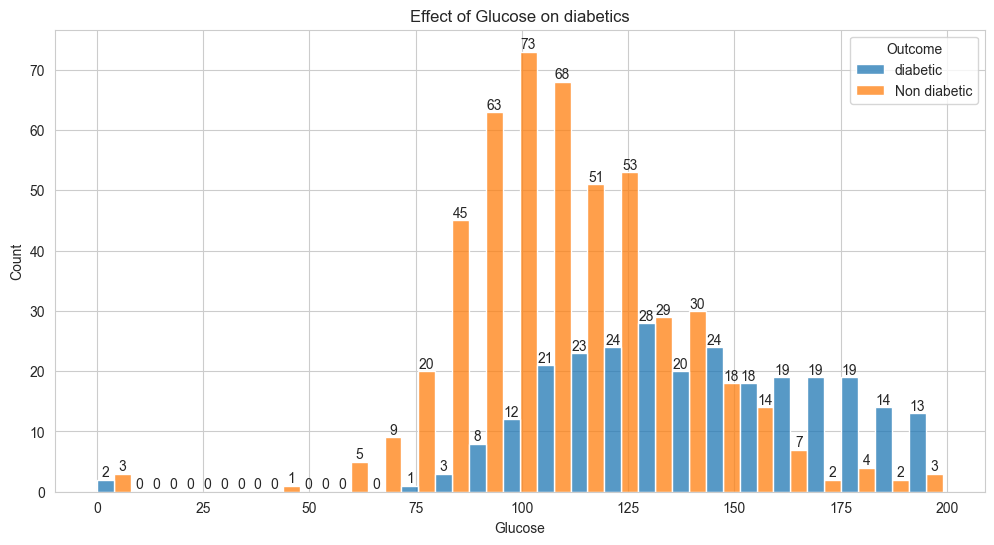

In [13]:
#Glucose
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"]=(12,6)
a=sns.histplot(data=df,x="Glucose",hue="Outcome",bins=20,binwidth=8,multiple="dodge")
plt.title("Effect of Glucose on diabetics")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

non-diabetic individuals mostly have glucose levels between 80-120 mg/dL, while diabetic individuals have higher levels, often exceeding 150 mg/dL. There is some overlap at 130 mg/dL indicating that glucose alone may not be a definitive predictor of diabetes. Glucose cannot be zero but it's not significant and might be recorded incorrectly or an outlier

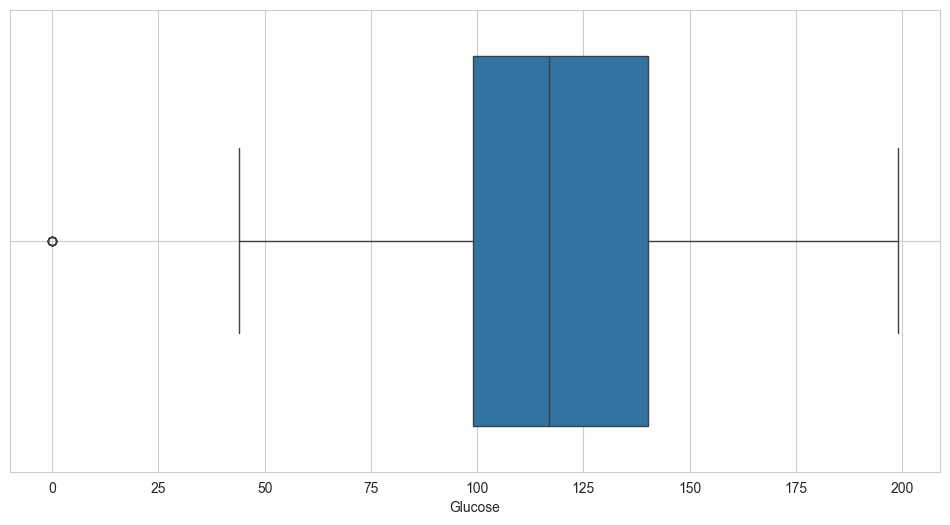

In [14]:
sns.boxplot(data=df,x="Glucose")
plt.grid(True)

Yes we do have outliers present at zero

In [15]:
#outliers
Q1 = df["Glucose"].quantile(0.25) 
Q3 = df["Glucose"].quantile(0.75) 
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
outliers = df[(df["Glucose"] < lower_bound) | (df["Glucose"] > upper_bound)]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,Non diabetic
182,1,0,74,20,23,27.7,0.299,21,Non diabetic
342,1,0,68,35,0,32.0,0.389,22,Non diabetic
349,5,0,80,32,0,41.0,0.346,37,diabetic
502,6,0,68,41,0,39.0,0.727,41,diabetic


In [17]:
df= df[(df["Glucose"] >= lower_bound) & (df["Glucose"] <= upper_bound)].copy()

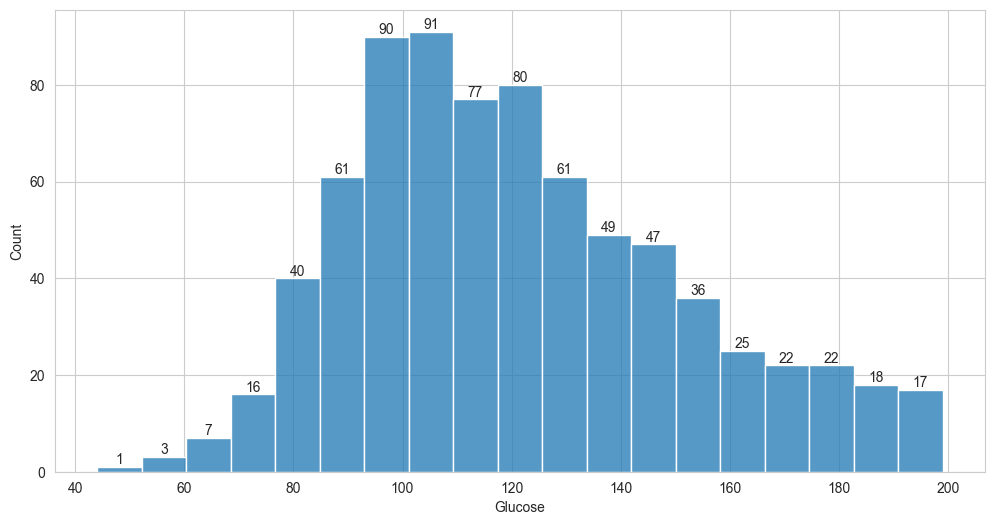

In [18]:
plt.rcParams["figure.figsize"]=(12,6)
sns.set_style("whitegrid")
a=sns.histplot(data=df,x="Glucose",bins=20,binwidth=8)
a.bar_label(a.containers[0]) 
plt.show()

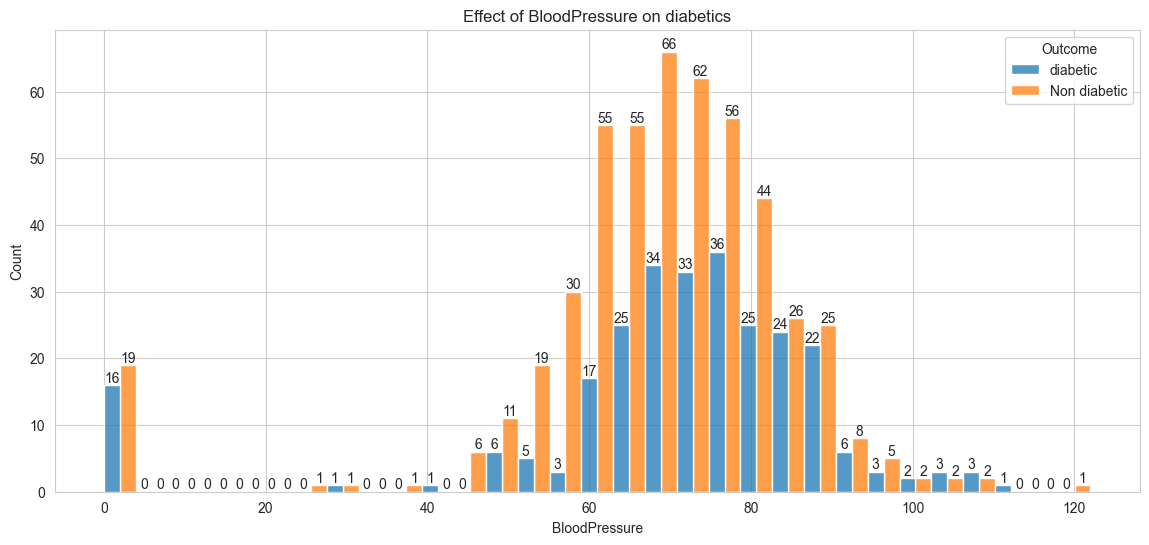

In [19]:
#BloodPressure
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"]=(14,6)
a=sns.histplot(data=df,x="BloodPressure",hue="Outcome",multiple="dodge")
plt.title("Effect of BloodPressure on diabetics")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

significant number of values at zero which is unusual since blood pressure typically doesn't drop to zero in a healthy dataset. This could indicate incorrectly recorded data or an Outlier

In [20]:
#Checking for outliers
df["BloodPressure"].describe()

count    763.000000
mean      69.115334
std       19.399240
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

There is not much deviation between min and Q1
and also between Q3 and max 

SD is relatively low compared to the mean which is good

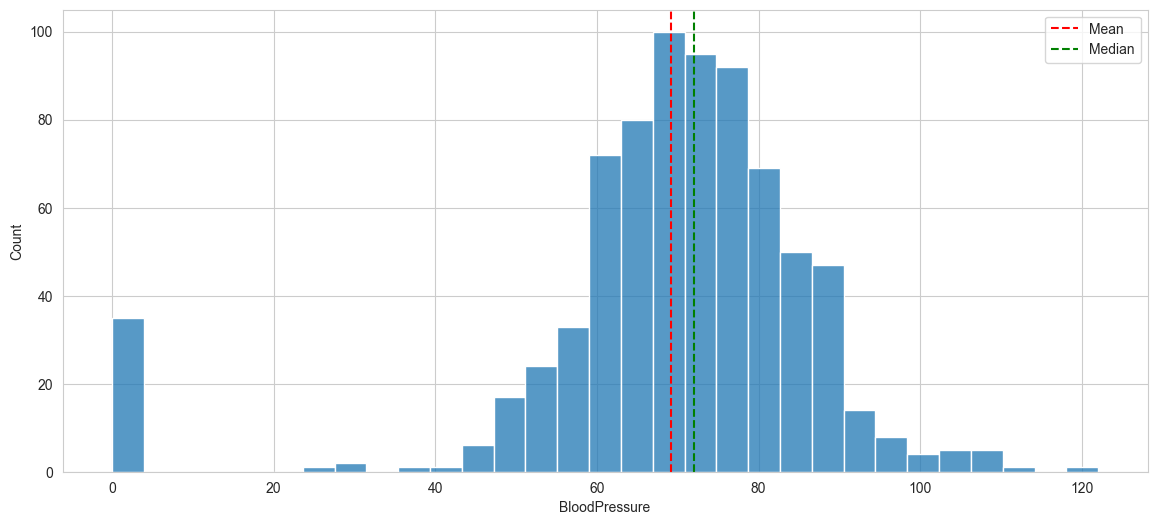

In [21]:
sns.histplot(data=df,x="BloodPressure")
plt.axvline(df["BloodPressure"].mean(),color="red",linestyle='dashed',label="Mean")
plt.axvline(df["BloodPressure"].median(),color="green",linestyle='dashed',label="Median")
plt.legend()
plt.show()

Mean and Median are close almost symmetric

<Axes: xlabel='Glucose'>

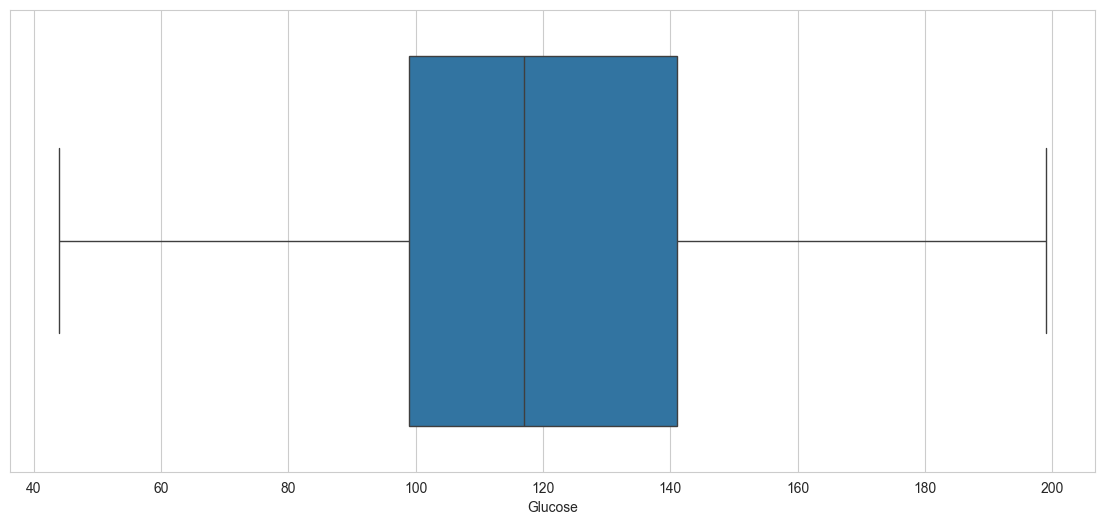

In [22]:
sns.boxplot(data=df,x="Glucose")

All the factors and the boxplot indicate that there aren't any outliters present and it might've been just recorded incorrectly

In [23]:
#Replacing zero with median
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].median())

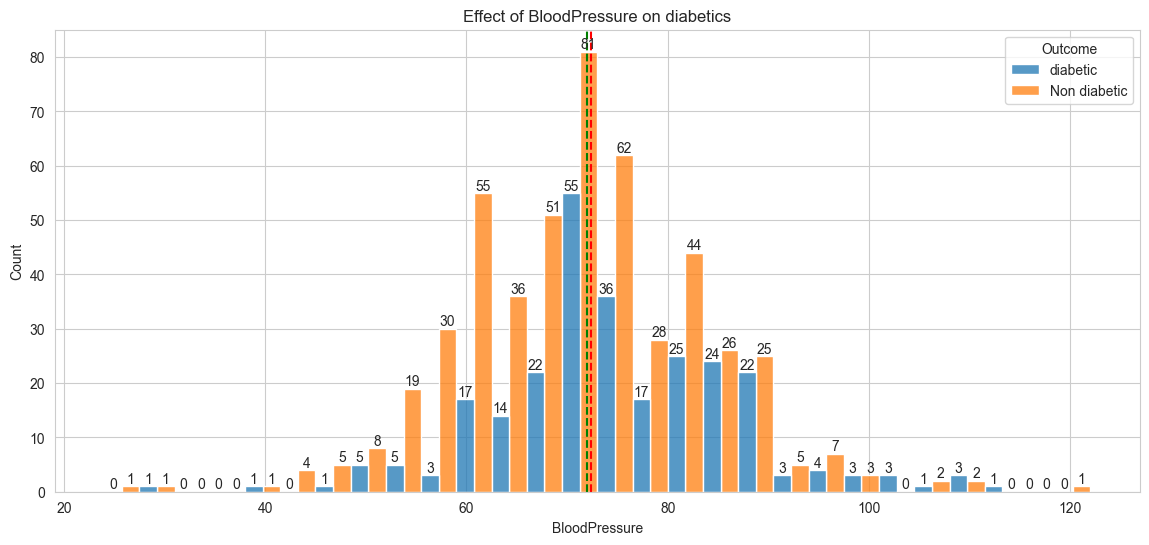

In [24]:
plt.rcParams["figure.figsize"]=(14,6)
a=sns.histplot(data=df,x="BloodPressure",hue="Outcome",multiple="dodge")
plt.title("Effect of BloodPressure on diabetics")
plt.axvline(df["BloodPressure"].mean(),color="red",linestyle='dashed',label="Mean")
plt.axvline(df["BloodPressure"].median(),color="green",linestyle='dashed',label="Median")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

blood pressure is normally distributed, with most values falling between 60 and 90. Non-diabetic individuals generally have a slightly higher count in the mid-range compared to diabetics. The previous issue of zero values has been resolved, leading to a more accurate representation of blood pressure distribution and irrespective of BP number of non diabetic individuals is higher

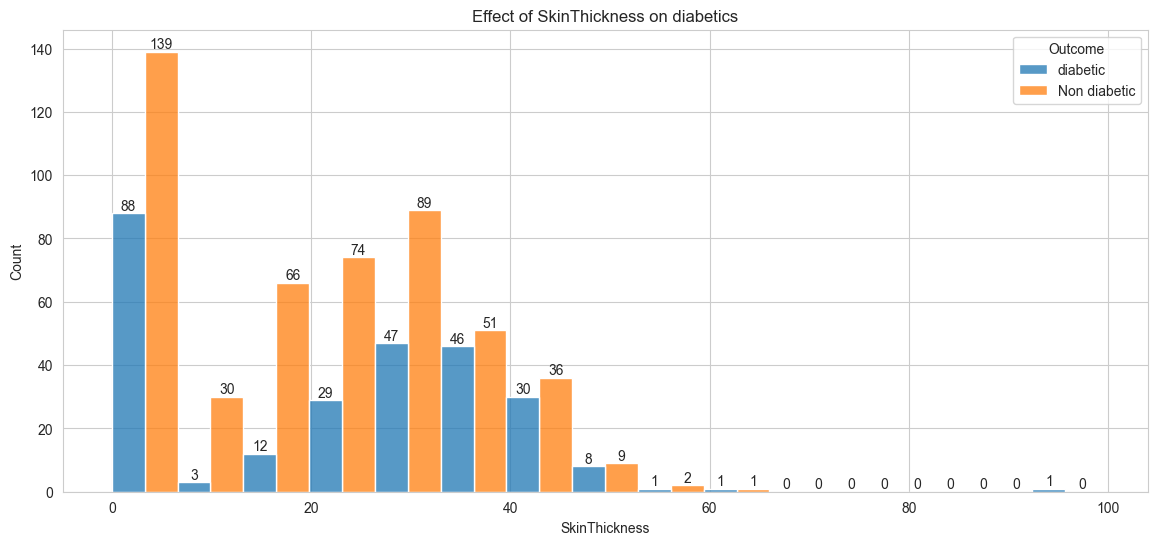

In [25]:
#SkinThickness
plt.rcParams["figure.figsize"]=(14,6)
a=sns.histplot(data=df,x="SkinThickness",hue="Outcome",multiple="dodge")
plt.title("Effect of SkinThickness on diabetics")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

Again we have a significant amount of values at zero which can be an outlier or just some incorrectly recorded value because skin thickness cannot be zero

In [26]:
#Checking for outliers
df["SkinThickness"].describe()

count    763.000000
mean      20.477064
std       15.973171
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

std is large compared to mean which might indicate outliers and huge difference between max and Q3

<Axes: xlabel='SkinThickness'>

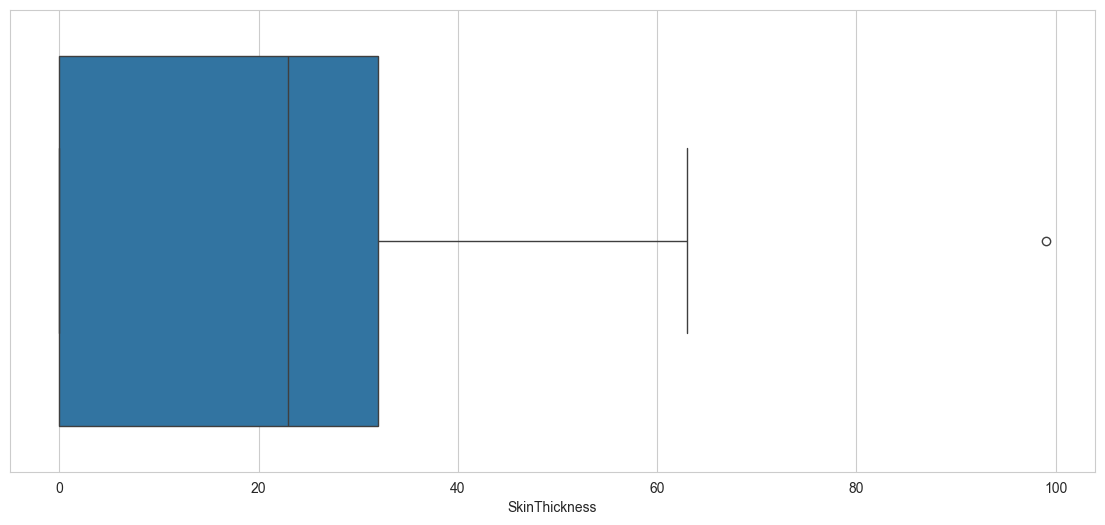

In [27]:
sns.boxplot(data=df,x="SkinThickness")

yes we do have outliers present in our dataset but firstly lets replace zero with median value

In [28]:
#Replacing zero with median
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].median())

In [29]:
#outliers
Q1 = df["SkinThickness"].quantile(0.25) 
Q3 = df["SkinThickness"].quantile(0.75) 
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [30]:
df= df[(df["SkinThickness"] >= lower_bound) & (df["SkinThickness"] <= upper_bound)].copy()

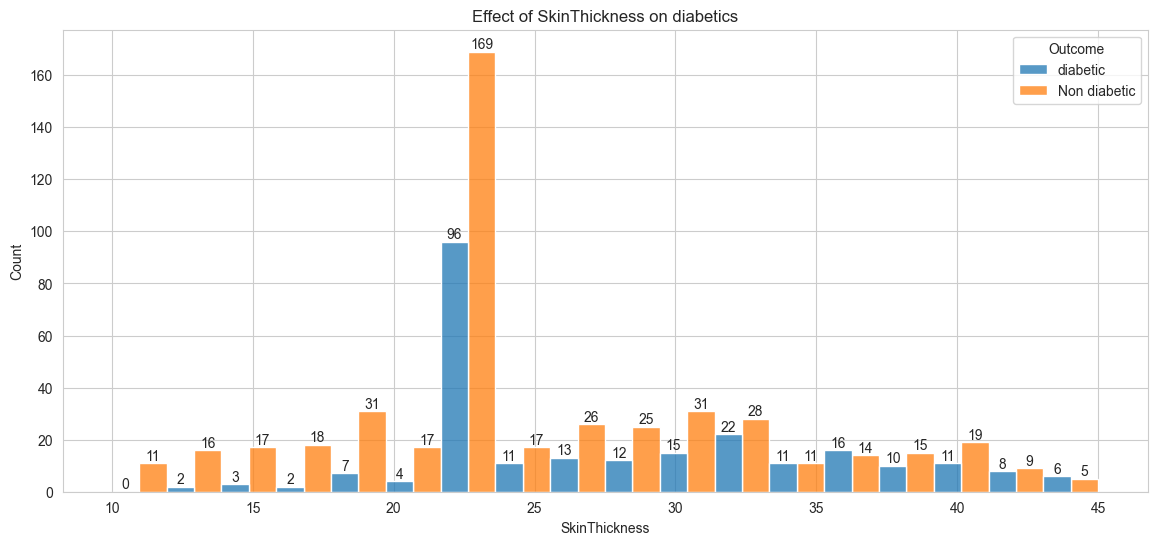

In [31]:
plt.rcParams["figure.figsize"]=(14,6)
a=sns.histplot(data=df,x="SkinThickness",hue="Outcome",multiple="dodge")
plt.title("Effect of SkinThickness on diabetics")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

regardless of the skin thickness we have higher number of non diabetic individuals and have a relatively high number of diabetic individuals at 22-23 

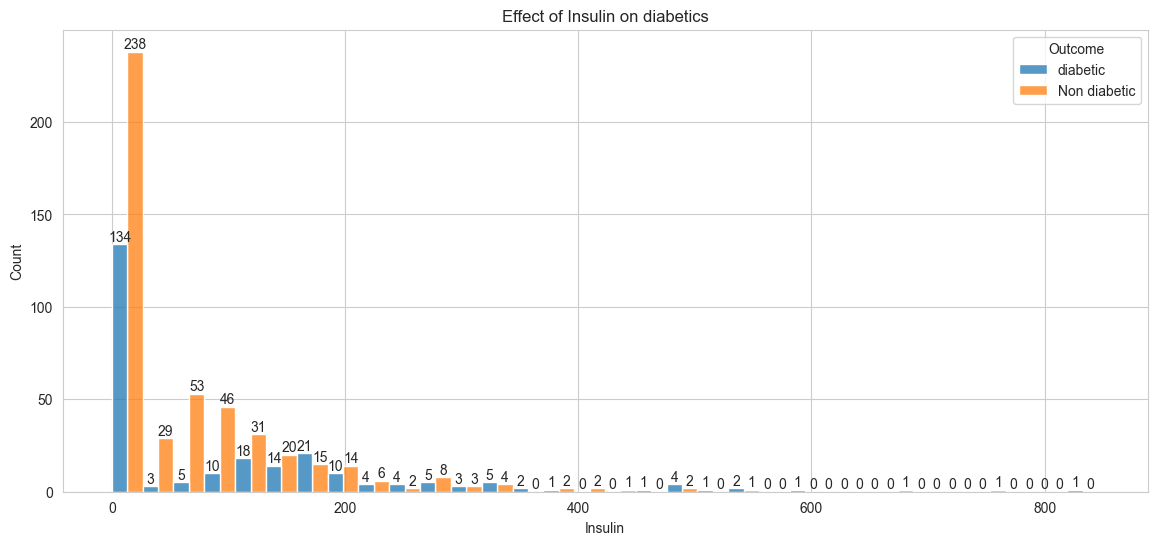

In [32]:
#Insulin
plt.rcParams["figure.figsize"]=(14,6)
a=sns.histplot(data=df,x="Insulin",hue="Outcome",multiple="dodge")
plt.title("Effect of Insulin on diabetics")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

Insulin cannot be that high 


<Axes: xlabel='Insulin'>

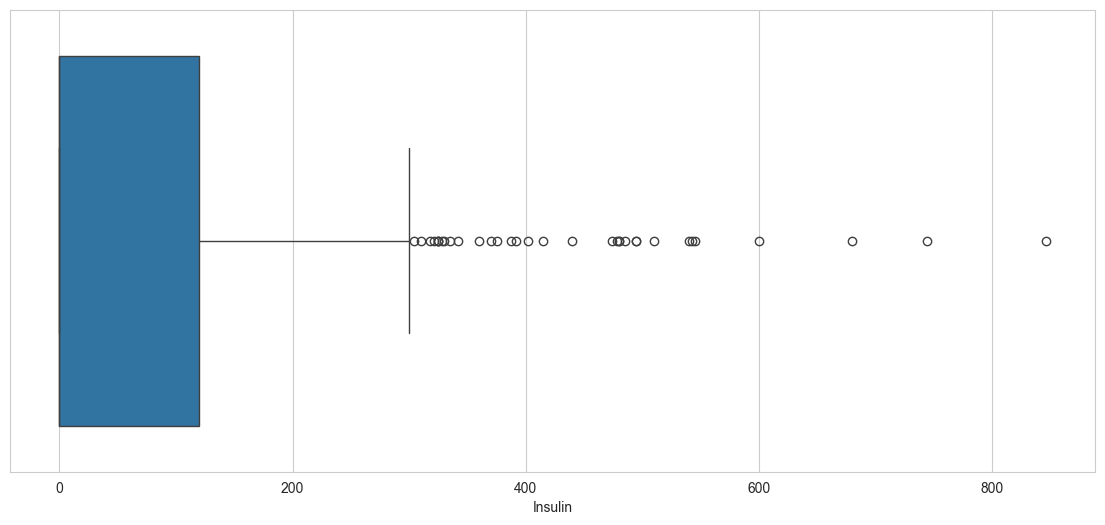

In [33]:
sns.boxplot(data=df,x="Insulin")

Outliers are present here as well

In [34]:
#outliers
Q1 = df["Insulin"].quantile(0.25) 
Q3 = df["Insulin"].quantile(0.75) 
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df["Insulin"] >= lower_bound) & (df["Insulin"] <= upper_bound)].copy()

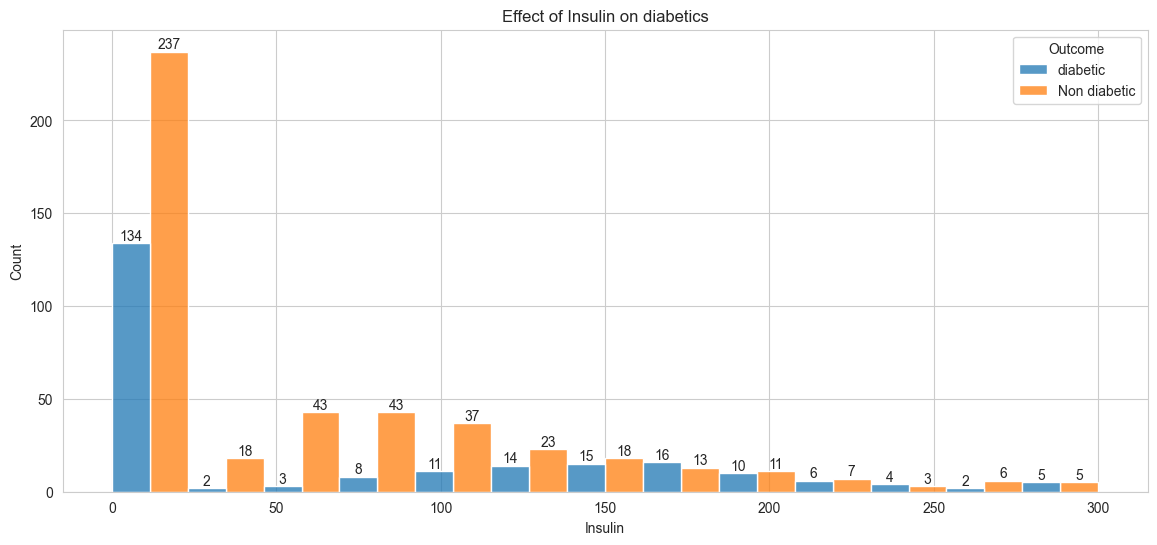

In [35]:
plt.rcParams["figure.figsize"]=(14,6)
a=sns.histplot(data=df,x="Insulin",hue="Outcome",multiple="dodge")
plt.title("Effect of Insulin on diabetics")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

both diabetic and non-diabetic individuals have a high frequency of insulin values at zero, with non-diabetic individuals having a larger count. As insulin levels increase, the frequency of both groups decreases, but non-diabetics tend to have slightly higher counts in mid-range insulin levels compared to diabetics.

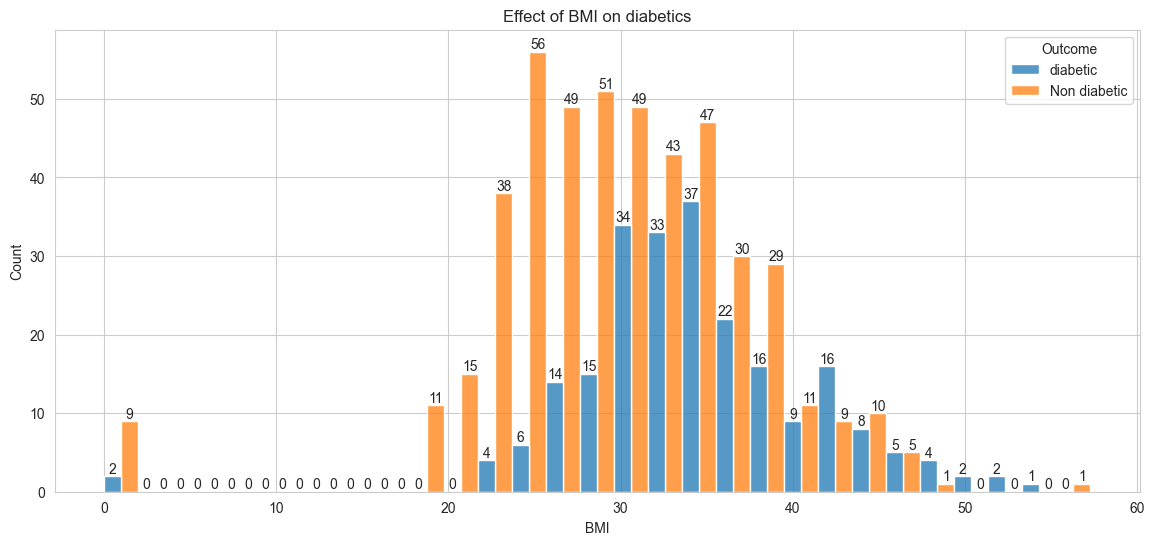

In [36]:
#BMI
a=sns.histplot(data=df,x="BMI",hue="Outcome",multiple="dodge")
plt.title("Effect of BMI on diabetics")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

BMI cannot zero

<Axes: xlabel='BMI'>

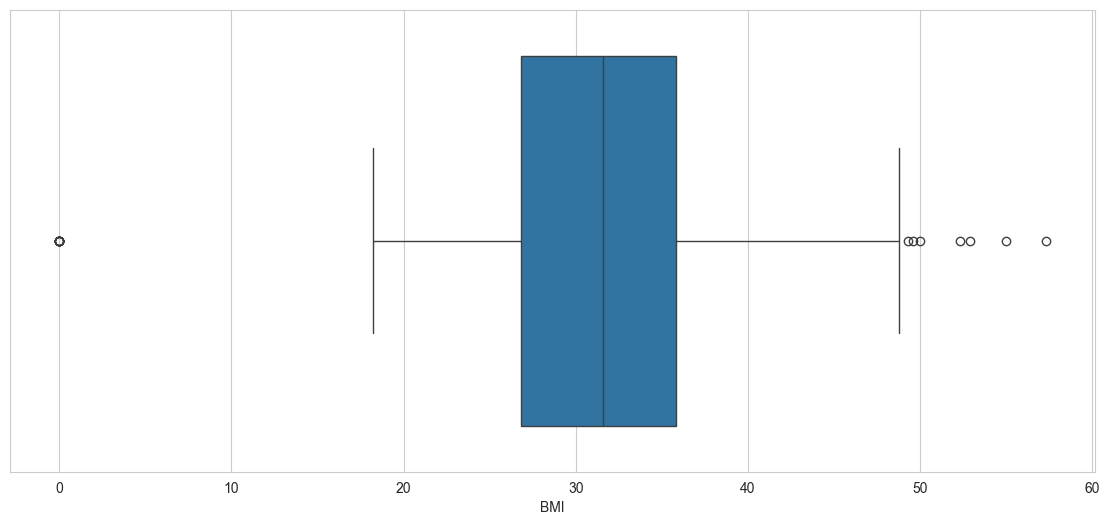

In [37]:
sns.boxplot(data=df,x="BMI")

Yes we do have outliers present over here as well

In [38]:
#outliers
Q1 = df["BMI"].quantile(0.25) 
Q3 = df["BMI"].quantile(0.75) 
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df["BMI"] >= lower_bound) & (df["BMI"] <= upper_bound)].copy()

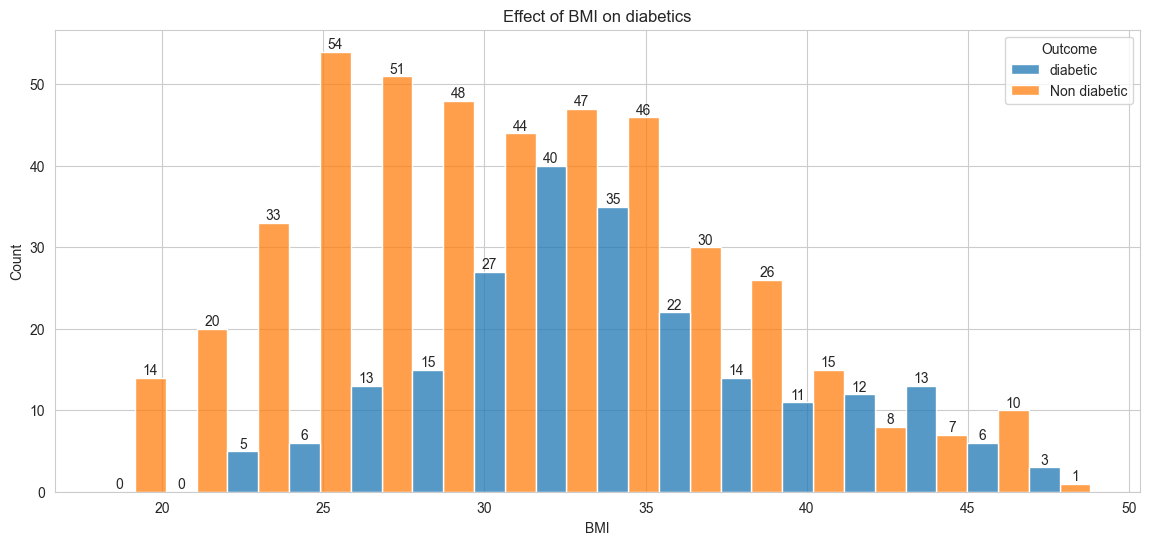

In [39]:
a=sns.histplot(data=df,x="BMI",hue="Outcome",multiple="dodge")
plt.title("Effect of BMI on diabetics")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

People with BMI over 30 have a higher chance of being diabetic 

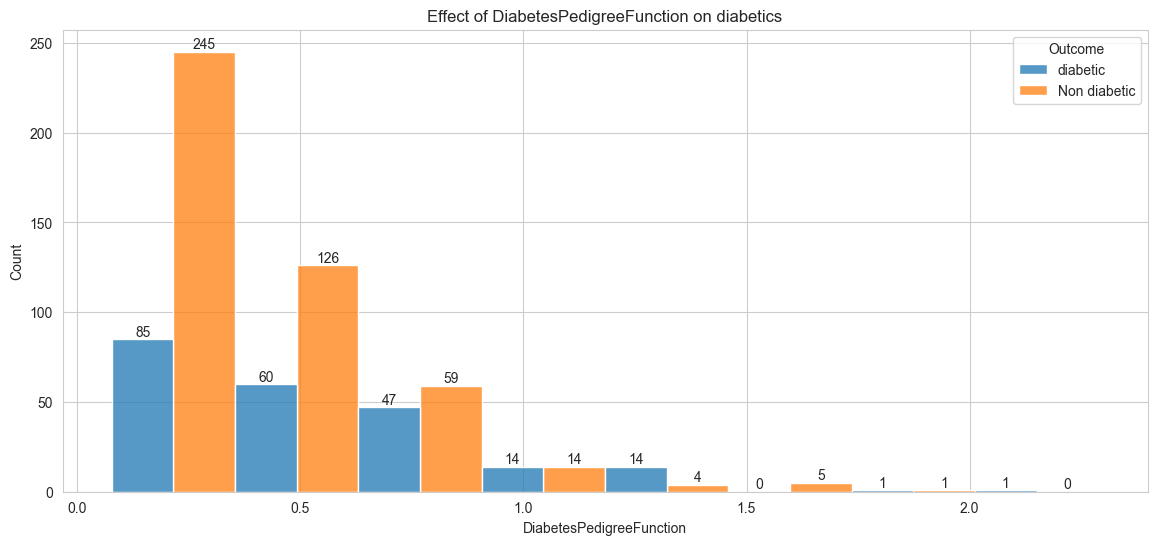

In [40]:
#DiabetesPedigreeFunction
a=sns.histplot(data=df,x="DiabetesPedigreeFunction",hue="Outcome",multiple="dodge",bins=8)
plt.title("Effect of DiabetesPedigreeFunction on diabetics")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

lower Diabetes Pedigree Function values (0.0-0.5) are more common in both diabetic and non-diabetic individuals, with non-diabetics having significantly higher counts. As the pedigree function increases, the frequency decreases for both groups, but diabetics tend to have slightly higher counts in the higher range.

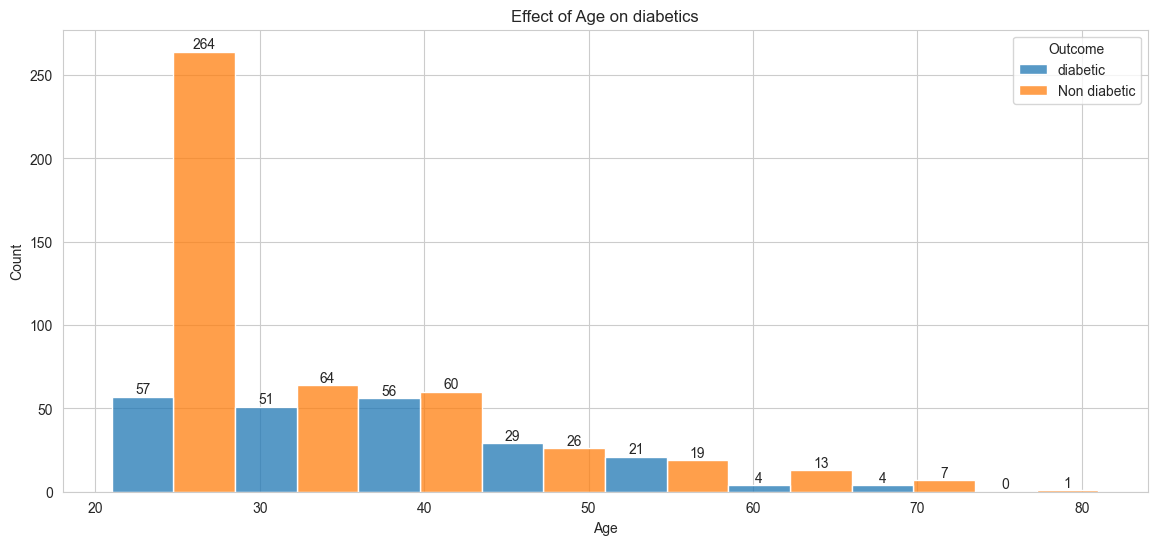

In [41]:
#Age
a=sns.histplot(data=df,x="Age",hue="Outcome",multiple="dodge",bins=8)
plt.title("Effect of Age on diabetics")
a.bar_label(a.containers[0]) 
a.bar_label(a.containers[1]) 
plt.show()

As the age increase the number of diabetic members is relatively high compared to non diabetic members 

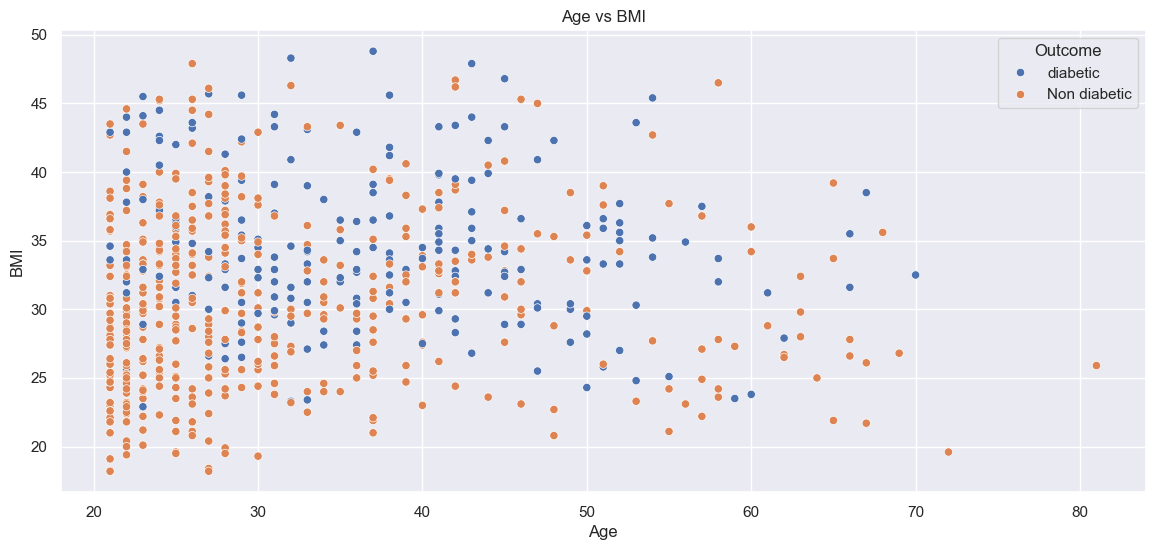

In [42]:
#Age vs bmi
sns.set_theme()
sns.scatterplot(data=df,x="Age",y="BMI",hue="Outcome")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Age vs BMI")
plt.show()

In [43]:
df1=df.groupby("Age")["BMI"].mean().reset_index()

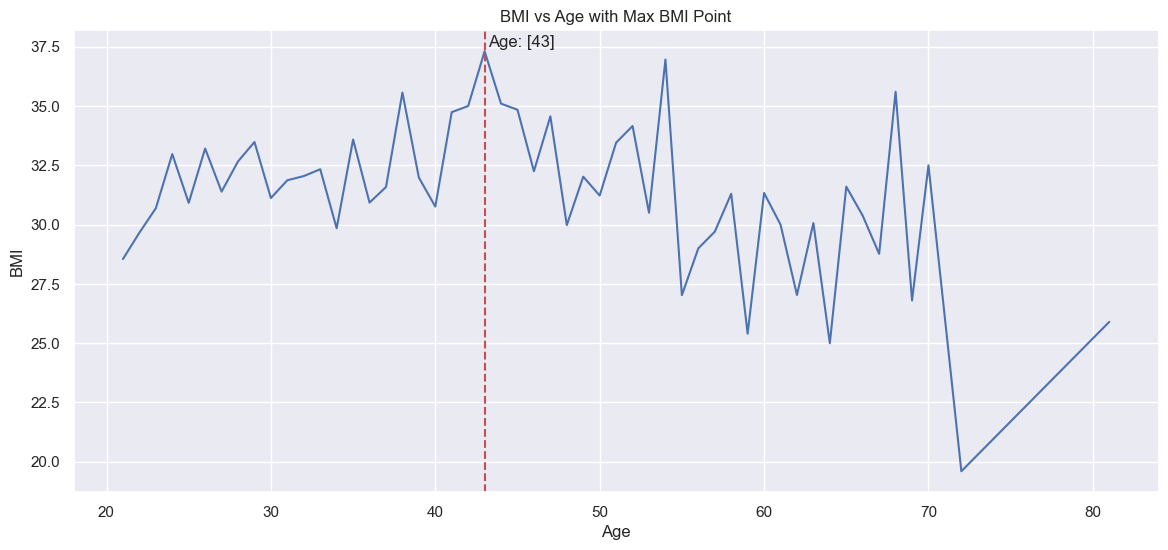

In [44]:
plt.plot(df1["Age"], df1["BMI"])
Max = df1["BMI"].max()
age_with_max_bmi = df1[df1["BMI"] == Max]["Age"].values
plt.axvline(x=age_with_max_bmi, color='r', linestyle='--')
plt.annotate(f'Age: {age_with_max_bmi}', 
             xy=(age_with_max_bmi, Max), 
             xytext=(age_with_max_bmi+0.2, Max + 0.2),)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI vs Age with Max BMI Point')
plt.show()

at age 43 we have the highest Average bmi

In [45]:
df["Outcome"]=df.Outcome.map({"Non diabetic":0,"diabetic":1})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
cor=df.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.155406,0.235162,0.096660,-0.111660,0.071895,-0.015192,0.535793,0.219832
Glucose,0.155406,1.000000,0.241636,0.107517,0.212303,0.217957,0.108946,0.282995,0.488298
BloodPressure,0.235162,0.241636,1.000000,0.110916,-0.084593,0.251397,-0.007482,0.359053,0.164041
SkinThickness,0.096660,0.107517,0.110916,1.000000,0.244017,0.509635,0.106807,0.047519,0.154744
Insulin,-0.111660,0.212303,-0.084593,0.244017,1.000000,0.169478,0.181488,-0.122860,0.071674
BMI,0.071895,0.217957,0.251397,0.509635,0.169478,1.000000,0.138668,0.068879,0.295915
DiabetesPedigreeFunction,-0.015192,0.108946,-0.007482,0.106807,0.181488,0.138668,1.000000,0.043872,0.194530
Age,0.535793,0.282995,0.359053,0.047519,-0.122860,0.068879,0.043872,1.000000,0.222019
Outcome,0.219832,0.488298,0.164041,0.154744,0.071674,0.295915,0.194530,0.222019,1.000000


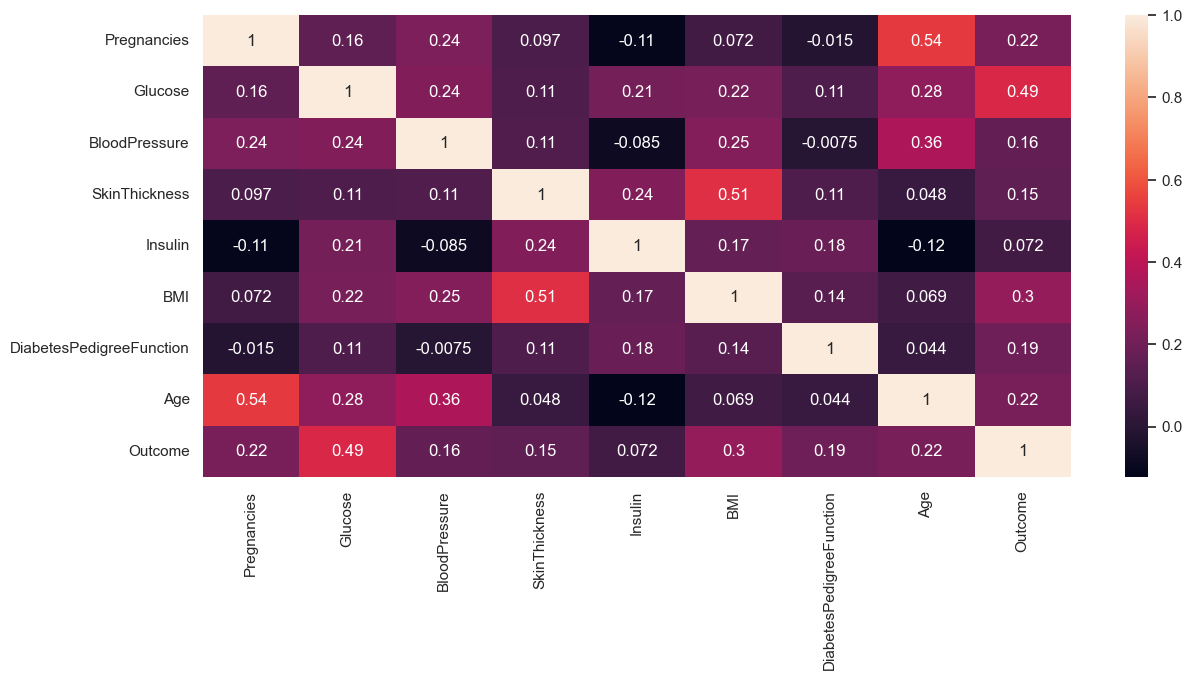

In [47]:
sns.heatmap(cor,annot=True)
plt.show()

glucose has the strongest positive correlation (0.49) with diabetes outcome, followed by BMI (0.30) and age (0.22). Pregnancies also have a moderate correlation (0.22) with diabetes. Other features, such as insulin and blood pressure, have weaker correlations with the outcome.